# 3. Two-asset efficient frontier

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
ret = pd.read_csv("data/data3_industry_30_vw_monthly.csv",
                 header=0, index_col=0)/100   #percentage to decimals right away
ret.index = pd.to_datetime(ret.index, format="%Y%m").to_period("M")
ret.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0191,-0.2379,0.0007,0.0187,-0.0002,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0797,...,0.0217,0.0202,0.0439,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.0447,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0230,...,0.0241,0.0225,0.0019,-0.0554,0.0007,-0.0787,0.0025,-0.0056,-0.0161,-0.0386


In [6]:
ret.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [7]:
ret.columns = ret.columns.str.strip() #remove the extra spaces in the column names
ret.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

<Axes: >

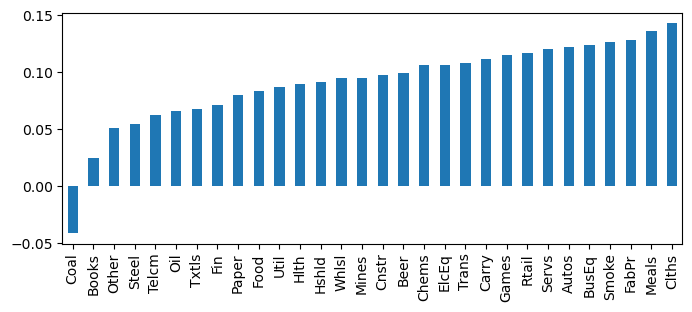

In [10]:
n_year = ret["2002":].shape[0]/12  #computing the number of years since 2002
eret = ((1+ret["2002":]).prod())**(1/n_year)-1  #expected(average) annual return
eret.sort_values().plot.bar(figsize=(8,3))

In [11]:
# covariance matrix
cov = ret["2002":].cov()*12  #annual variance
cov.head(4)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.014584,0.011444,0.014720,0.018695,0.016820,0.011146,0.014478,0.010235,0.016717,0.021528,...,0.014347,0.013508,0.014819,0.013971,0.014024,0.014935,0.011871,0.012974,0.015314,0.013737
Beer,0.011444,0.017883,0.013826,0.013924,0.013194,0.011987,0.011975,0.010005,0.013547,0.016035,...,0.012279,0.010940,0.012070,0.012822,0.012322,0.012130,0.010532,0.011665,0.013083,0.012758
Smoke,0.014720,0.013826,0.045972,0.017741,0.017690,0.012106,0.013011,0.011872,0.014757,0.018106,...,0.016463,0.013424,0.016980,0.014890,0.014134,0.016097,0.009509,0.013073,0.015603,0.014752
Games,0.018695,0.013924,0.017741,0.064248,0.041778,0.018038,0.038500,0.020632,0.040233,0.058355,...,0.029437,0.035113,0.039236,0.031388,0.033720,0.033009,0.028029,0.028991,0.038456,0.031805


In [12]:
#making a function for portfolio returns
def portfolio_ret(weights, returns):
    """
    weights + returns --> portfolio return
    """
    return weights.T@returns #matrix multiplication: @

In [13]:
#making a function for portfolio volatility
def portfolio_vol(weights, covmat):
    """
    weights + covariance matrix --> portfolio volatility
    """
    return weights.T@covmat@weights

In [14]:
l = ["Food","Beer","Smoke","Games"] 
eret[l]

Food     0.083784
Beer     0.099543
Smoke    0.126471
Games    0.115264
dtype: float64

In [16]:
cov.loc[l,l] #.loc:location, covariance matrix of 4x4 

,Food,Beer,Smoke,Games
Food,0.014584,0.011444,0.014720,0.018695
Beer,0.011444,0.017883,0.013826,0.013924
Smoke,0.014720,0.013826,0.045972,0.017741
Games,0.018695,0.013924,0.017741,0.064248


In [17]:
w = np.array([.25,.25,.25,.25])
w

array([0.25, 0.25, 0.25, 0.25])

In [19]:
portfolio_ret(w,eret[l])

0.10626554205342381

In [20]:
portfolio_vol(w,cov.loc[l,l])

0.020211585566963182

## The case of two-assets:

In [21]:
weights = [np.array([w,1-w]) for w in np.linspace(0,1,21)]  #list comprehension--> np.linspace: linear spacing btw 2 numbers
weights

[array([0., 1.]),
 array([0.05, 0.95]),
 array([0.1, 0.9]),
 array([0.15, 0.85]),
 array([0.2, 0.8]),
 array([0.25, 0.75]),
 array([0.3, 0.7]),
 array([0.35, 0.65]),
 array([0.4, 0.6]),
 array([0.45, 0.55]),
 array([0.5, 0.5]),
 array([0.55, 0.45]),
 array([0.6, 0.4]),
 array([0.65, 0.35]),
 array([0.7, 0.3]),
 array([0.75, 0.25]),
 array([0.8, 0.2]),
 array([0.85, 0.15]),
 array([0.9, 0.1]),
 array([0.95, 0.05]),
 array([1., 0.])]

In [22]:
l = ["Games","Beer"]  #two assets
ereturns = [portfolio_ret(w, eret[l]) for w in weights] 
vols = [portfolio_vol(w,cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": ereturns,
                  "V": vols})
ef.head()

,R,V
0,0.099543,0.017883
1,0.100329,0.017623
2,0.101115,0.017634
3,0.101901,0.017917
4,0.102687,0.018471


<Axes: xlabel='V', ylabel='R'>

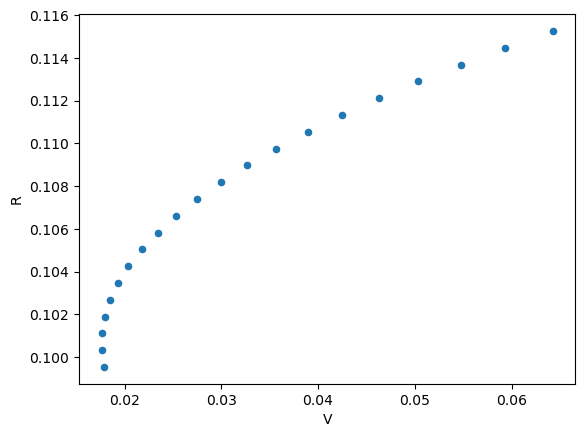

In [23]:
#plot the efficient frontier
ef.plot.scatter(x="V", y="R")

<Axes: xlabel='V'>

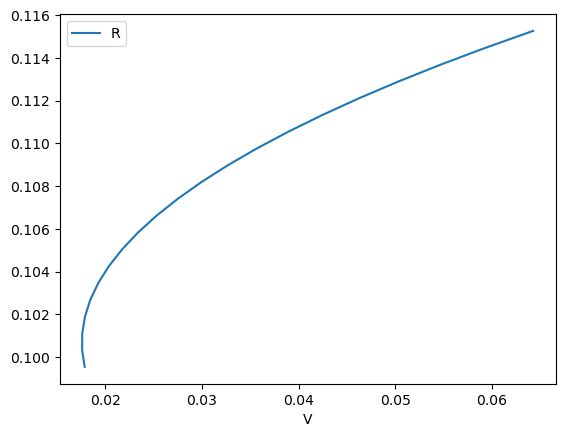

In [24]:
ef.plot.line(x="V", y="R")